In [24]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import mnist_loader

In [25]:
model = joblib.load("../trained_model.pkl")

In [26]:
model.sizes

[784, 30, 10]

In [27]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
test_data = list(test_data)
len(test_data)

10000

In [28]:
test_data[0][0].shape, test_data[0][1] #first image's true label is 7

((784, 1), np.int64(7))

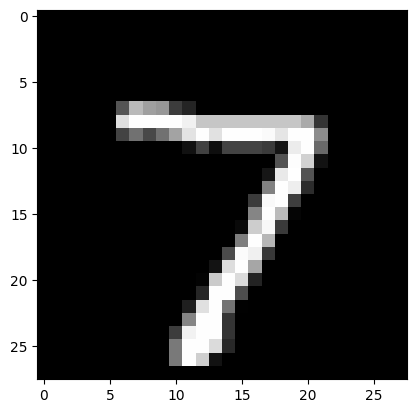

In [29]:
plt.imshow(test_data[0][0].reshape(28, 28), cmap='gray')

In [30]:
print("List of test results in the format (predicted label, true label):")
test_results = [(np.argmax(model.feed_forward(x)[0][-1]), y) for (x, y) in test_data]
test_results = np.array(test_results)
test_results

List of test results in the format (predicted label, true label):


array([[7, 7],
       [2, 2],
       [1, 1],
       ...,
       [4, 4],
       [5, 5],
       [6, 6]], shape=(10000, 2))

#### As we can see, the model corretly classifies a lot of these samples, the first element of each tuple is our models prediction and the second element is the true label

### Lets check where our model fails to predict the correct label

In [31]:
print(f"Number of misclassified numbers: {np.where(test_results[:, 0] != test_results[:, 1])[0].shape[0]}")
print(f"Fraction of misclassified numbers: {np.where(test_results[:, 0] != test_results[:, 1])[0].shape[0]/len(test_data)}")
print(f"Fraction of correctly classified numbers: {1 - np.where(test_results[:, 0] != test_results[:, 1])[0].shape[0]/len(test_data)}")

Number of misclassified numbers: 468
Fraction of misclassified numbers: 0.0468
Fraction of correctly classified numbers: 0.9532


In [32]:
print(f"First 10 misclassified indicies {np.where(test_results[:, 0] != test_results[:, 1])[0][:10]}")

First 10 misclassified indicies [ 15  18  63  92 124 149 158 185 241 247]


**Lets check out the one of the indexes in the above list**

In [33]:
test_results[18]

array([8, 3])

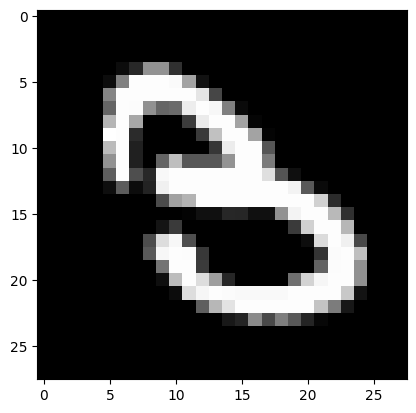

In [34]:
plt.imshow(test_data[18][0].reshape(28, 28), cmap='gray')

### Our model incorrectly predicts this image as an 8, when in reality it is a 3, but to be honest this image is a very hard image even for us to classify